<a href="https://colab.research.google.com/github/Slimlav/Netology/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**
- Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
%matplotlib inline

In [2]:
DTFBIC = pd.read_csv('daily-total-female-births-in-cal.csv')
IAP = pd.read_csv('international-airline-passengers.csv')
MMATD = pd.read_csv('mean-monthly-air-temperature-deg.csv')
MBARJ = pd.read_csv('monthly-boston-armed-robberies-j.csv')
MSOCXJ6 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
WCOTD = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

In [3]:
all_series = {
    'Daily total female births in cal': DTFBIC['Count'],
    'International airline passengers': IAP['Count'],
    'Mean monthly air temperature deg': MMATD['Deg'],
    'Monthly boston armed robberies j': MBARJ['Count'],
    'Monthly sales of company x': MSOCXJ6['Count'],
    'Weekly closings of the dowjones': WCOTD['Close']
}

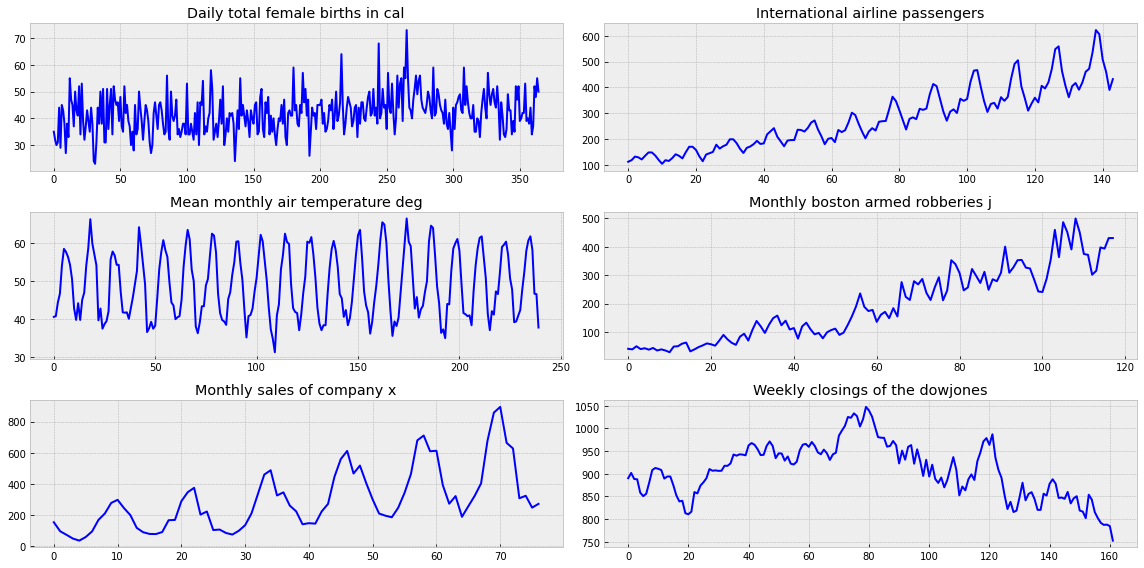

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [5]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [6]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Daily total female births in cal.
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


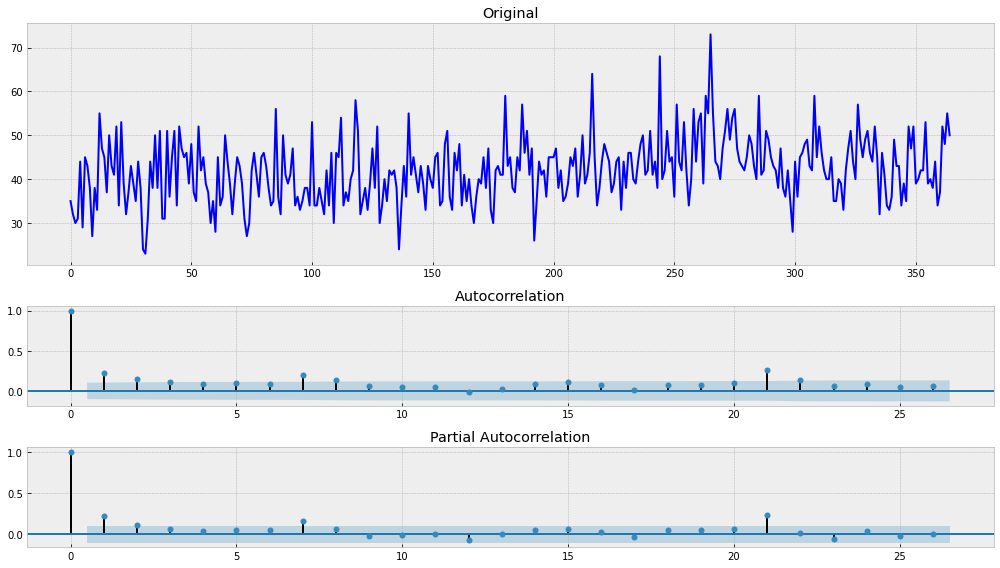

In [7]:
print('Daily total female births in cal.')
tsplot(all_series['Daily total female births in cal'])

- Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.


International airline passengers.
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


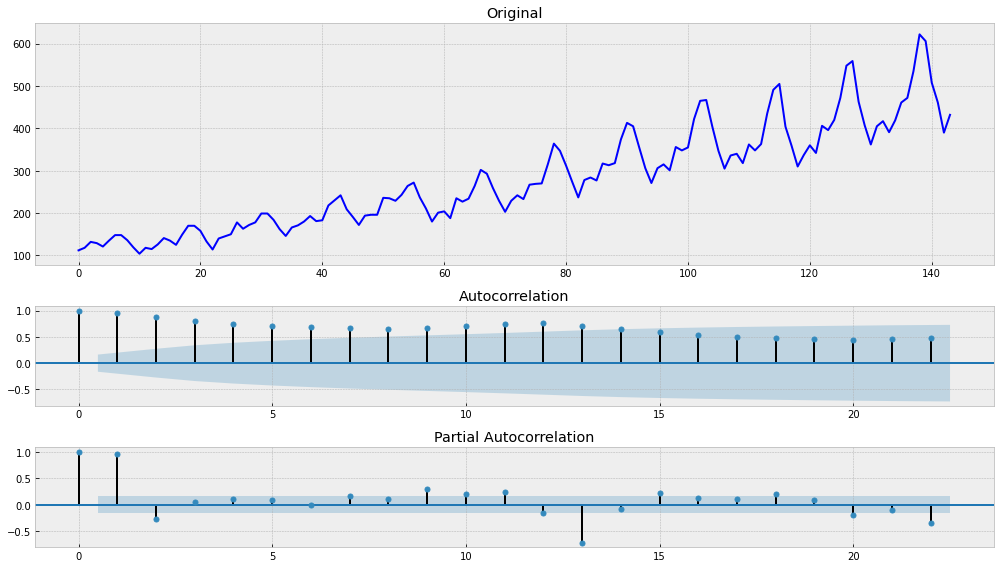

In [8]:
print('International airline passengers.')
tsplot(all_series['International airline passengers'])

- Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда.

In [9]:
series = boxcox(all_series['International airline passengers'], 0) #Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = series[1:] - series[:-1] #Дифференцируем.
series = series[12:] - series[:-12] # Убераем влияние сезонности

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


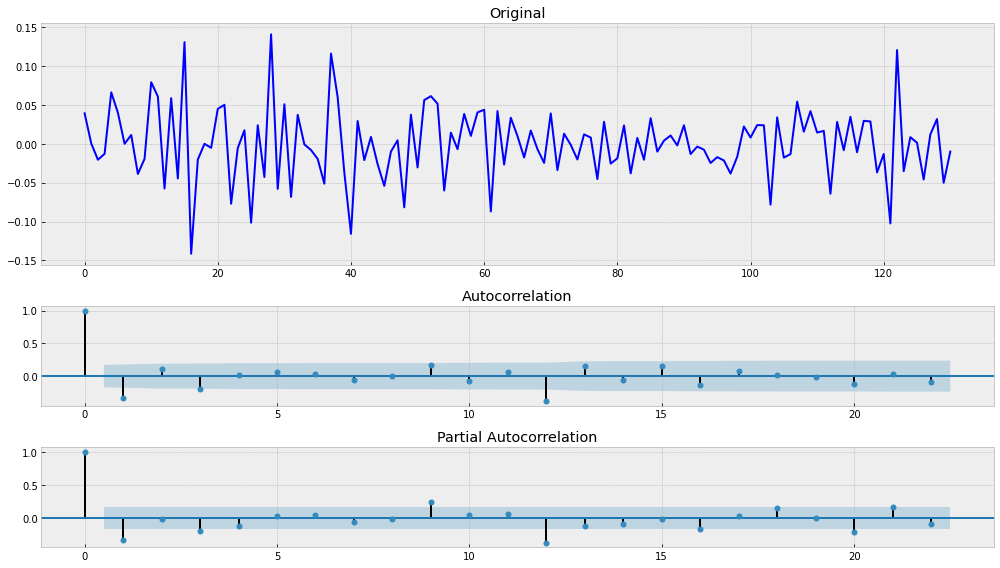

In [10]:
tsplot(series)

Mean monthly air temperature deg.
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


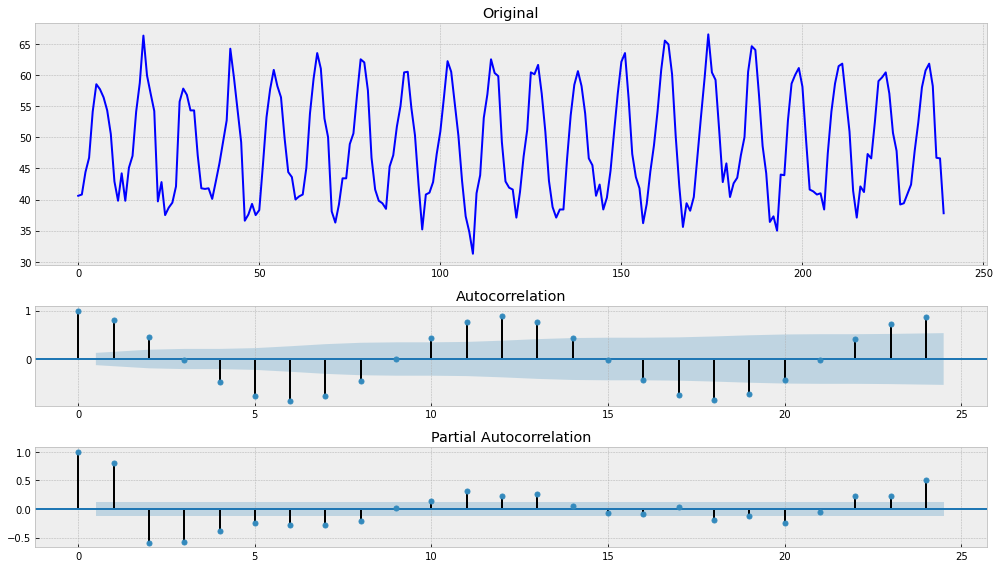

In [11]:
print('Mean monthly air temperature deg.')
tsplot(all_series['Mean monthly air temperature deg'])

- Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

Monthly boston armed robberies j.
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


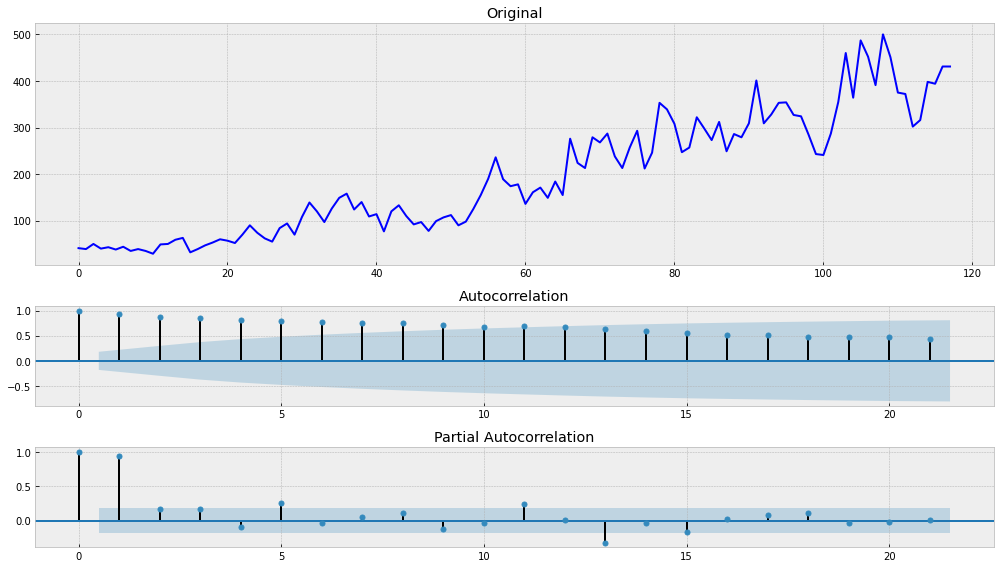

In [12]:
print('Monthly boston armed robberies j.')
tsplot(all_series['Monthly boston armed robberies j'])

- Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Есть тренд.

In [15]:
series = boxcox(all_series['Monthly boston armed robberies j'], 0) #Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = series[1:] - series[:-1] #Дифференцируем.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


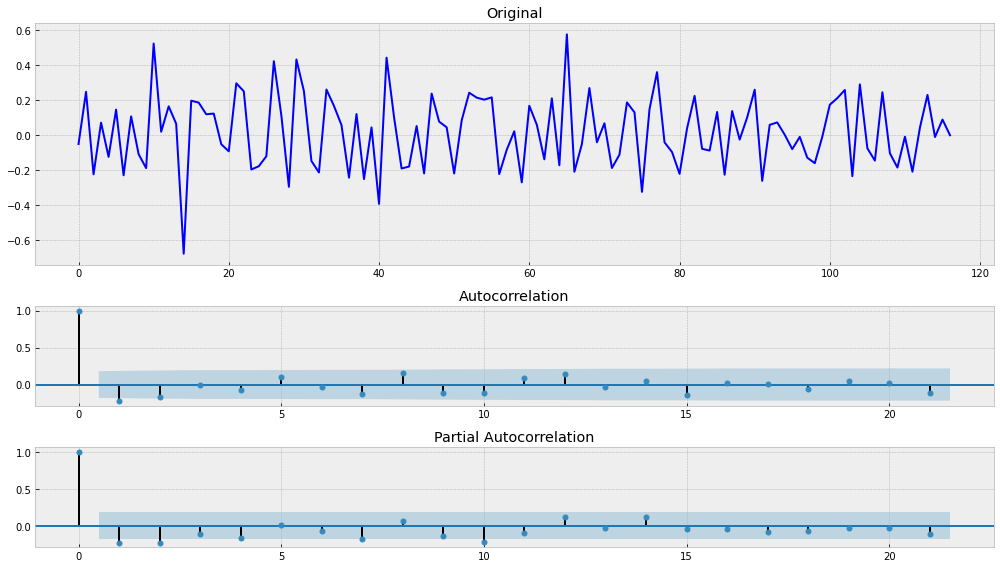

In [16]:
tsplot(series)

- Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

Monthly sales of company x.
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


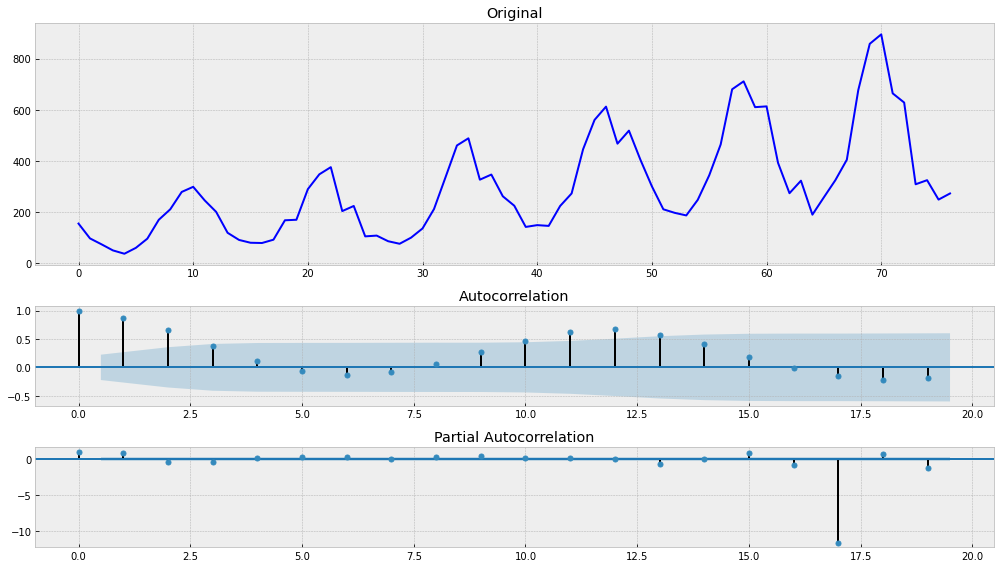

In [17]:
print('Monthly sales of company x.')
tsplot(all_series['Monthly sales of company x'])

- Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Есть цикл.

In [20]:
series = boxcox(all_series['Monthly sales of company x'], 0) #Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = series[1:] - series[:-1] #Дифференцируем.
#series = series[12:] - series[:-12] # Убераем влияние сезонности

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


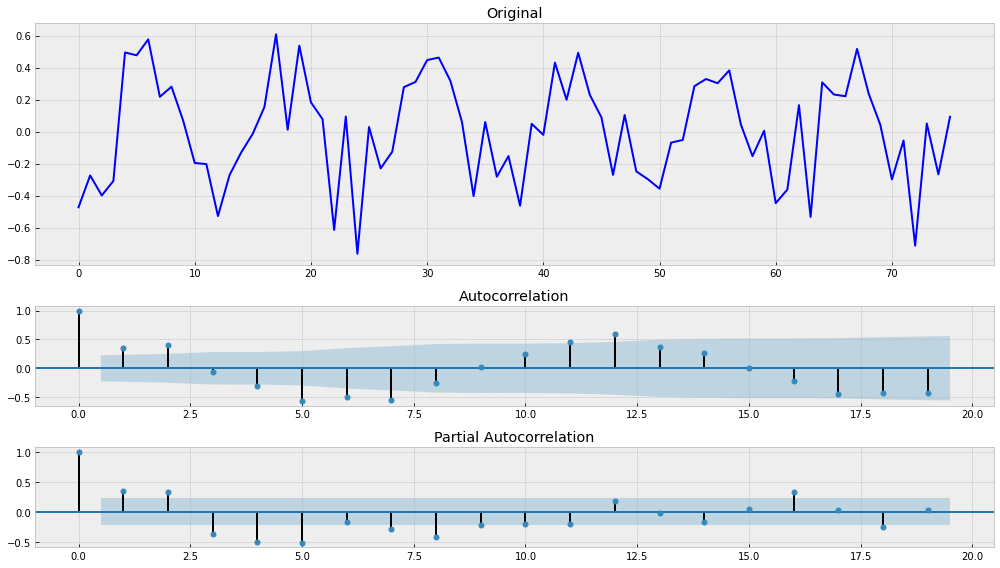

In [21]:
tsplot(series)

- Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

Weekly closings of the dowjones.
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


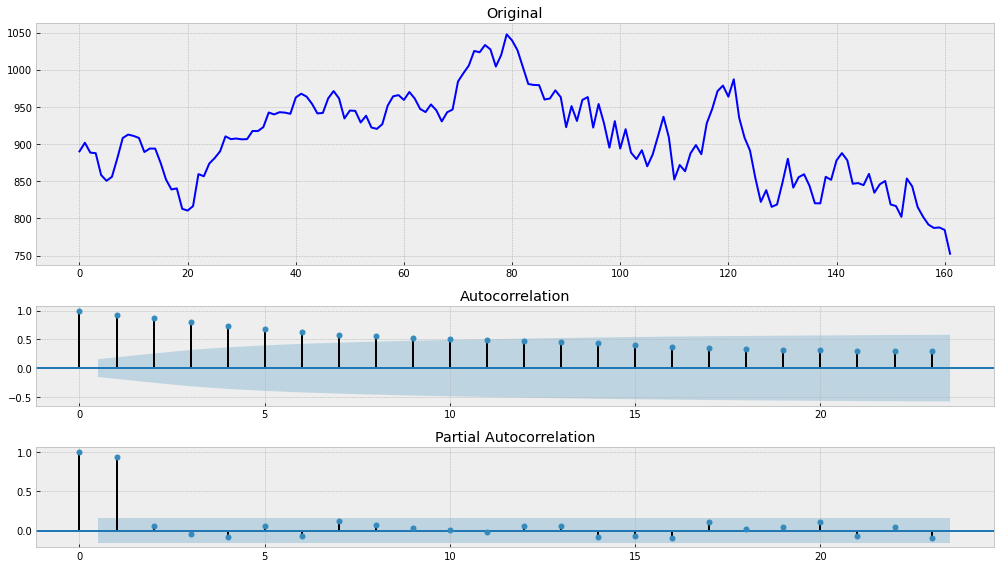

In [22]:
print('Weekly closings of the dowjones.')
tsplot(all_series['Weekly closings of the dowjones'])

- Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Есть тренд и сезонности.

In [30]:
series = boxcox(all_series['Weekly closings of the dowjones'], 0) #Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = series[1:] - series[:-1] #Дифференцируем.
#series = series[12:] - series[:-12] # Убераем влияние сезонности.

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


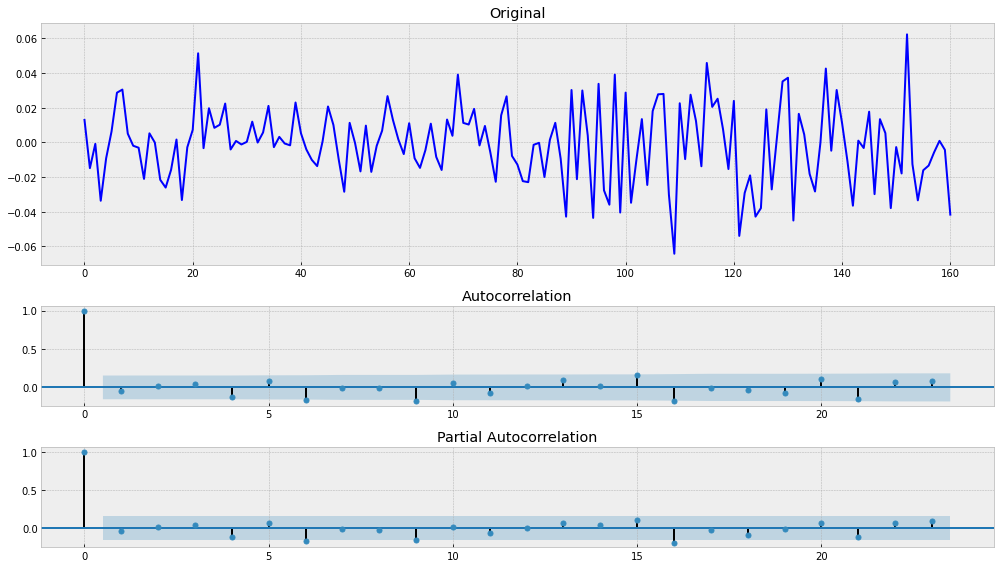

In [31]:
tsplot(series)

- Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.